<a href="https://colab.research.google.com/github/thgemanuel/Exercicio-3-Topicos-em-Inteligencia-Computacional/blob/main/Ajuste_do_modelo_de_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ajuste do modelo de RL**


E se pudésssemos explicar a proporção da variância da variável preditora (variação explicada/variação total) a partir das variáveis ​​independentes (X) no modelo?

O coeficiente de determinação, geralmente denotado como R², representa justamente essa proporção da variância. Ele fornece uma indicação da qualidade do ajuste do modelo, e é uma medida estatística de quão próximos os dados estão da linha de regressão estimada.

A melhor pontuação possível é 1,0 e pode ser negativa.

Considere $\hat{y}_i$ o valor previsto da $i$-ésima amostra, $y_i$ o valor verdadeiro e $n$  o total de amostras, o R² pode ser definido como:

$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

em que $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ e $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$

Fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

**Considere um exemplo artificial :**




In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

X = np.array([-0.1,-7,-2,1.3,-10,18,11,6.8,5,6.53,3.80,6.2,-2.,9,5,7,-19,4,-0.4,-8.48])
y = np.array([0.6,-12,-2.5,2,-15,46,25,17.08,17,15.29,10,13.7,-3,24,14,16,-32,14,-0.9,-15])

X = X.reshape(-1,1)
y = y.reshape(-1,1)
regr = linear_model.LinearRegression()
# treina o modelo
regr.fit(X, y)

y_pred = regr.predict(X)

r2_score(y, y_pred)



0.9778432559918097

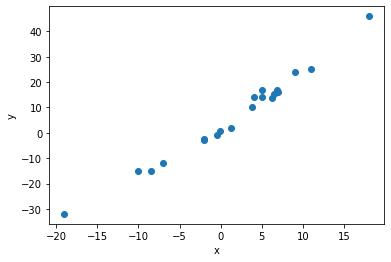

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

O $R^2$ está sempre entre 0 e 1:


1.       0 indica que o modelo não explica a variabilidade dos dados

2.   1 indica que o modelo explica toda a variabilidade dos dados

No exemplo, o modelo se ajusta bem aos seus dados. 

Para utilizarmos o método de regressão linear e, consequentemente o $R^2$, supomos que:

1.   As amostras são aleatórias independentes e identicamente distribuídas de uma distribuição.  Em outras palavras, as amostras não influenciam uns aos outros.

2.   A distribuição é estacionária; isto é, a distribuição não muda dentro do conjunto de dados.

3. As amostras são de partições da mesma distribuição.

Na prática, às vezes, violamos essas suposições. Quando sabemos que qualquer uma das três premissas básicas anteriores foi violada, devemos prestar muita atenção às métricas.

Fonte: [Tópico Generalization ](https://developers.google.com/machine-learning/crash-course/generalization/peril-of-overfitting) do Google Machine Learning Crash Course


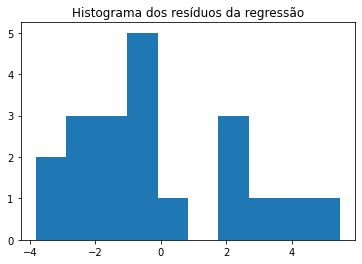

In [ ]:
res = y - y_pred

plt.hist(res)
plt.title('Histograma dos resíduos da regressão')
plt.show()


Os resíduos precisam ter distribuição normal com média 0. 

É preciso que os resíduos e a variável resposta sejam não correlacionados.

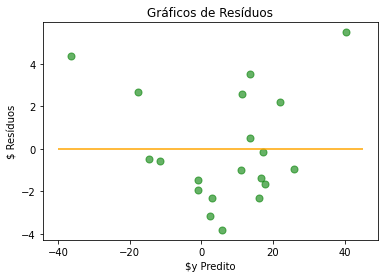

In [ ]:
plt.scatter(y=res, x=y_pred, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-40, xmax=45, color='orange')
plt.ylabel('$ Resíduos')
plt.xlabel('$y Predito')
plt.title ('Gráficos de Resíduos')
plt.show()

Quando os erros estão distribuídos aleatoriamente em torno de zero, indica o comportamento esperado para distribuição.


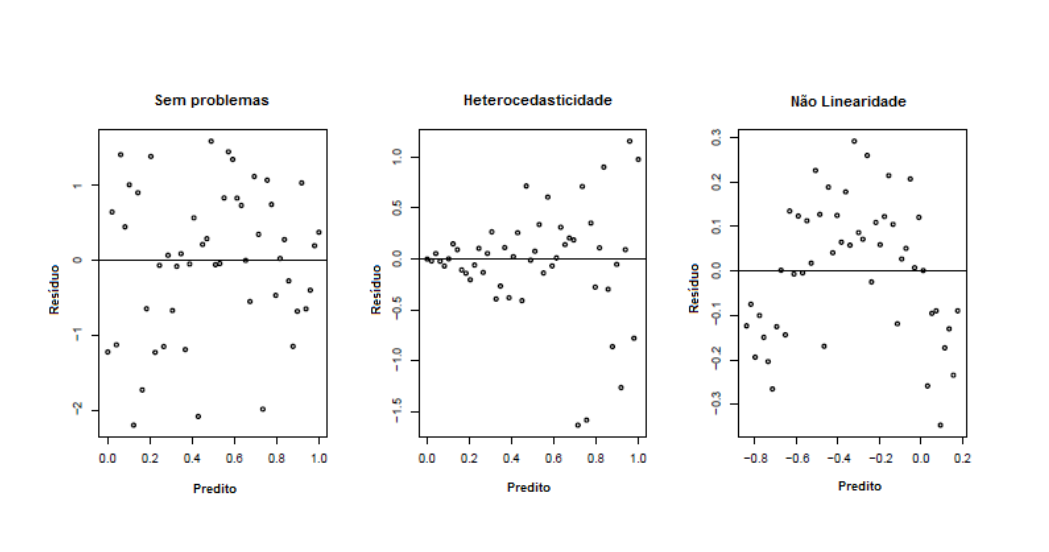





1.   sem problemas
2.   variância não constante dos erros (heterocedasticidade)
3. não linearidade

Fonte: [Análise de Resíduos](https://docs.ufpr.br/~niveam/ce071/aula7.pdf)





In [ ]:
from statsmodels.stats.diagnostic import normal_ad

p_value = normal_ad(res)[1]

print('p-value abaixo 0.05 geralmente significa não normal:', round(p_value[0],2))
print()
if p_value < 0.05:
  print('Residuos não são normalmente distribuídos')
else:
  print('Residuos são normalmente distribuídos')
    


p-value abaixo 0.05 geralmente significa não normal: 0.09

Residuos são normalmente distribuídos


Quem desejar explorar um pouco mais sobre como se certificar das suposições necessárias para o modelo de regressão linear, pode ler o material usado o exemplo acima: [Testing Linear Regression Assumptions in Python ](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)


# **Base de dados Diabetes**
---



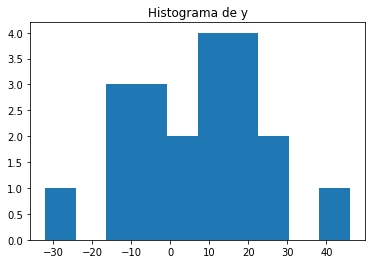

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn import linear_model
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela['y'] = diabetes.target

plt.hist(y)
plt.title('Histograma de y')
plt.show()


In [ ]:
X = tabela['age']
X_treinamento = X[:-20].array.to_numpy().reshape(-1,1)
X_teste = X[-20:].array.to_numpy().reshape(-1,1)

y = tabela['y']
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)


regr = linear_model.LinearRegression()

regr.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

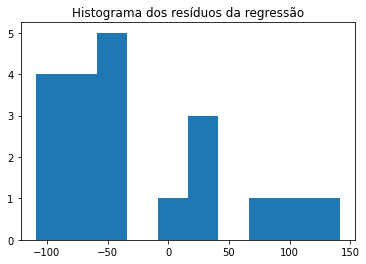

In [ ]:
diabetes_y_pred = regr.predict(X_teste)

res = y_teste - diabetes_y_pred.reshape(-1,1)

plt.hist(res)
plt.title('Histograma dos resíduos da regressão')
plt.show()


**O que esse gráfico nos diz?**

In [ ]:
p_value = normal_ad(res)[1]
print('p-value abaixo 0.05 geralmente significa não normal:', round(p_value[0],2))

p-value abaixo 0.05 geralmente significa não normal: 0.04


**Vamos escolher outra variável**

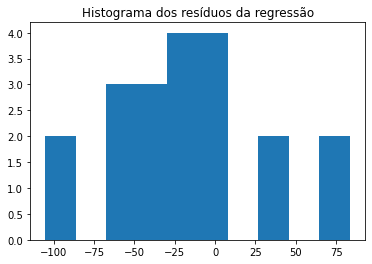

In [ ]:
X_bmi = tabela['bmi']
X_tr_bmi = X_bmi[:-20].array.to_numpy().reshape(-1,1)
X_teste_bmi = X_bmi[-20:].array.to_numpy().reshape(-1,1)

regr = linear_model.LinearRegression()

regr.fit(X_tr_bmi, y_treinamento)
diabetes_y_pred_bmi = regr.predict(X_teste_bmi)

res_b = y_teste - diabetes_y_pred_bmi.reshape(-1,1)

plt.hist(res_b)
plt.title('Histograma dos resíduos da regressão')
plt.show()

In [ ]:
p_value = normal_ad(res_b)[1]
print('p-value abaixo 0.05 geralmente significa não normal:', round(p_value[0],2))

p-value abaixo 0.05 geralmente significa não normal: 0.51


In [ ]:
r2_score(y_teste, diabetes_y_pred_bmi)

0.47257544798227147

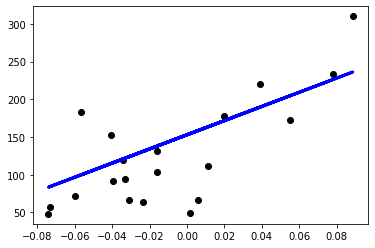

In [ ]:
plt.scatter(X_teste_bmi, y_teste,  color='black')
plt.plot(X_teste_bmi, diabetes_y_pred_bmi, color='blue', linewidth=3)
plt.show()

É possível saber se duas variáveis possuem alguma relação entre si dentro de um conjunto de dados?

Sem aprofundar nos conceitos estatísticos, podemos dizer que a correlação indica a interdependência entre duas ou mais variáveis. São vários métodos para calcular, um dos mais conhecidos é Coeficiente de Correlação de Pearson. Seu valor fica sempre entre -1 e 1. A correlação de Pearson, entretanto, mede a associação linear entre variáveis contínuas.

Calculamos a correlação com o módulo Pandas e sua função corr(), que irá retornarm a correlação de cada coluna com as outras colunas.

In [ ]:
cr = tabela.corr()

print(cr)

          age       sex       bmi  ...        s5        s6         y
age  1.000000  0.173737  0.185085  ...  0.270777  0.301731  0.187889
sex  0.173737  1.000000  0.088161  ...  0.149918  0.208133  0.043062
bmi  0.185085  0.088161  1.000000  ...  0.446159  0.388680  0.586450
bp   0.335427  0.241013  0.395415  ...  0.393478  0.390429  0.441484
s1   0.260061  0.035277  0.249777  ...  0.515501  0.325717  0.212022
s2   0.219243  0.142637  0.261170  ...  0.318353  0.290600  0.174054
s3  -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697 -0.394789
s4   0.203841  0.332115  0.413807  ...  0.617857  0.417212  0.430453
s5   0.270777  0.149918  0.446159  ...  1.000000  0.464670  0.565883
s6   0.301731  0.208133  0.388680  ...  0.464670  1.000000  0.382483
y    0.187889  0.043062  0.586450  ...  0.565883  0.382483  1.000000

[11 rows x 11 columns]


É muito importante ter cuidado ao avaliar as correlações. Alguns dados podem nos levar a crer  numa relação que não existe de fato, portanto, "correlação não implica causalidade". Por exemplo:

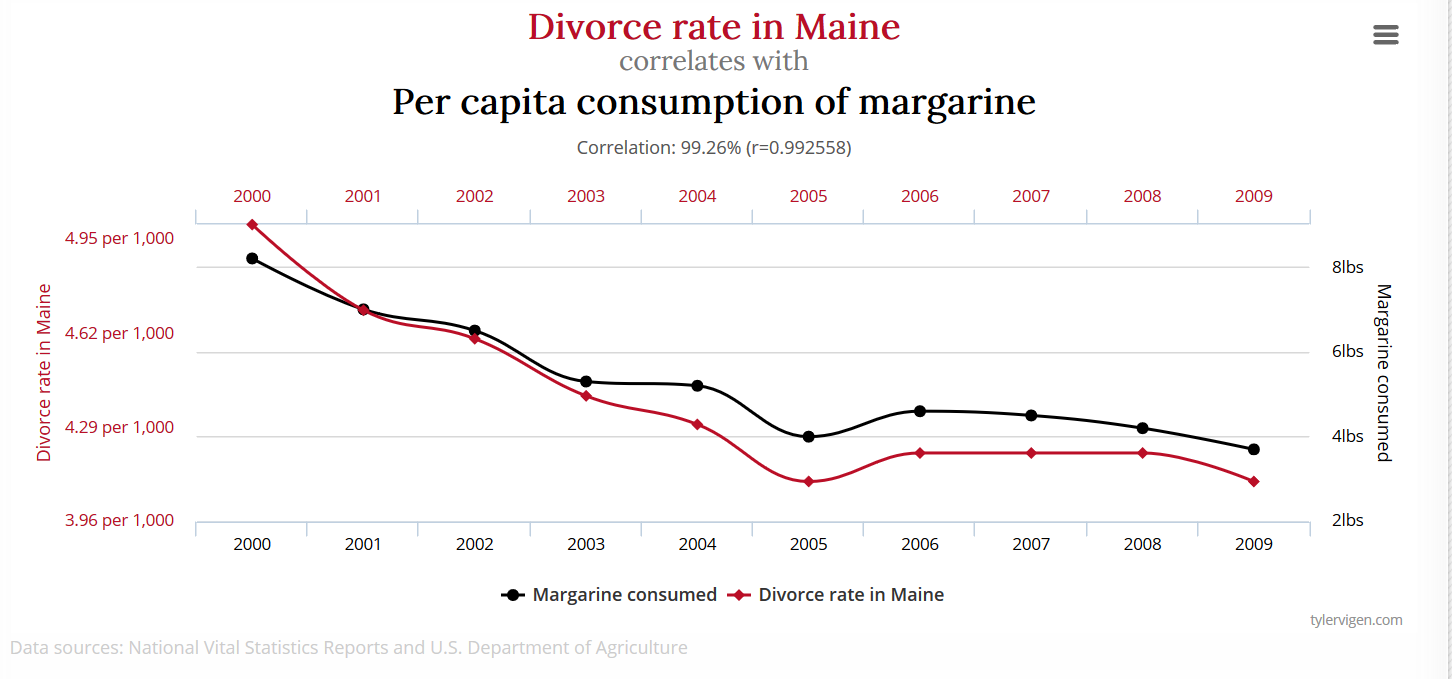

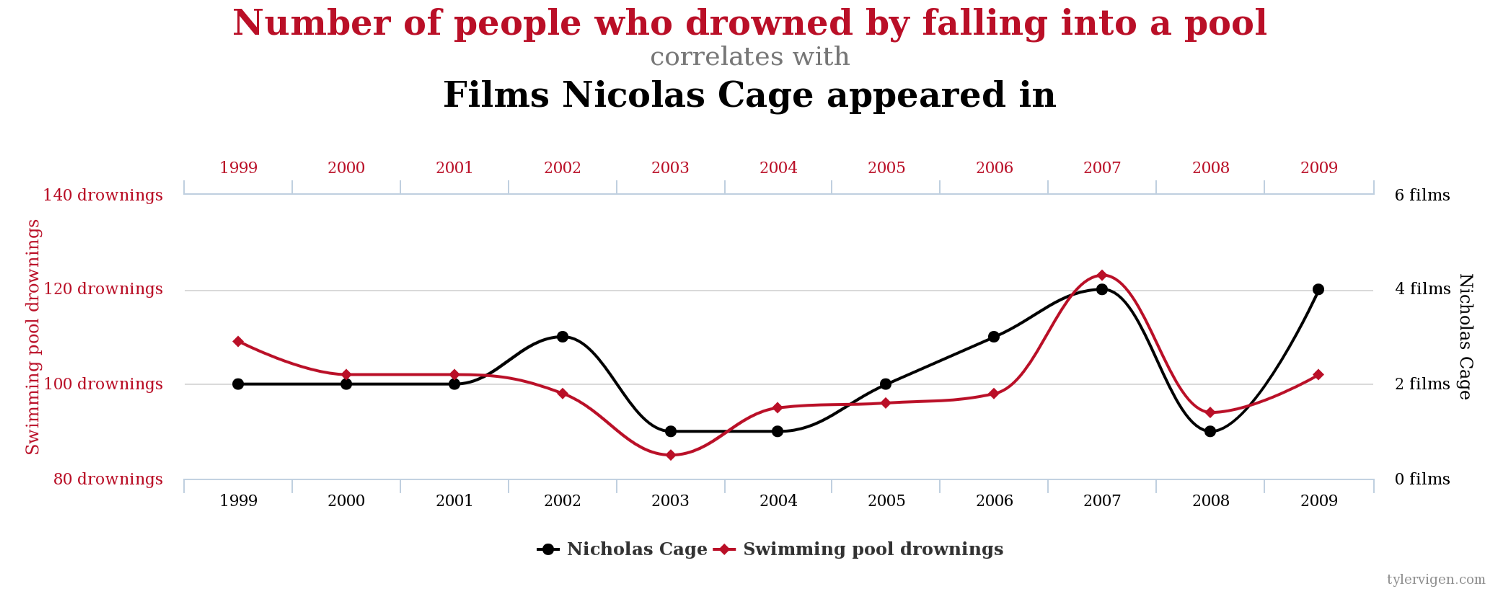

Fonte: [Spurious Correlations](http://www.tylervigen.com/spurious-correlations)

# Exercícios


Considere, as  características da base de dados Diabetes do exercício anterior:

1.   Para cada característica individualmente calcule o $R^2$, mostre o histograma e o gráfico de resíduos, e calcule o teste de normalidade. Compare o resultado com a característica "age".
2.   Adicionalmente, também mostre o histograma e o gráfico de resíduos, para o processo com as duas características (regressão com duas variáveis) do exercício anterior.



**Bibliografia**

[Função r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)


[Estatística Descritiva com Python](http://felipegalvao.com.br/blog/2016/03/31/estatistica-descritiva-com-python/)

[Correlação: direto ao ponto](https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb)
